In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

df=pd.read_csv("Diwali Sales Data.csv",encoding = "unicode_escape")
print(df.head(10))

   User_ID  Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0  1002903  Sanskriti  P00125942      F     26-35   28               0   
1  1000732     Kartik  P00110942      F     26-35   35               1   
2  1001990      Bindu  P00118542      F     26-35   35               1   
3  1001425     Sudevi  P00237842      M      0-17   16               0   
4  1000588       Joni  P00057942      M     26-35   28               1   
5  1000588       Joni  P00057942      M     26-35   28               1   
6  1001132       Balk  P00018042      F     18-25   25               1   
7  1002092   Shivangi  P00273442      F       55+   61               0   
8  1003224     Kushal  P00205642      M     26-35   35               0   
9  1003650      Ginny  P00031142      F     26-35   26               1   

              State      Zone       Occupation Product_Category  Orders  \
0       Maharashtra   Western       Healthcare             Auto       1   
1    Andhra Pradesh  Southern      

In [3]:
df.shape

(11251, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [9]:
df.drop(["Status","unnamed1"],axis = 1,inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [11]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [12]:
df.dropna(inplace = True)

In [13]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [14]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610858
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [15]:
df["Amount"]=df["Amount"].astype('int')

In [16]:
df['Amount'].dtype

dtype('int32')

In [17]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


# Exploratory Data Analysis


### Gender



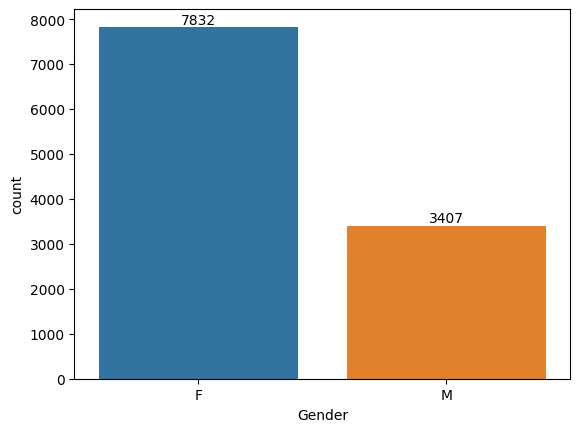

In [18]:
# plotting bar plot for gender and its count 


ax = sns.countplot(x = 'Gender',data = df,hue  ='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

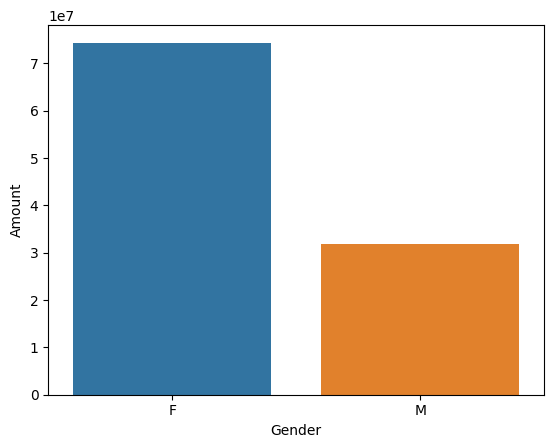

In [19]:
sales_gen = df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values( by ='Amount', ascending = False)

ax=sns.barplot(x='Gender',y='Amount',data = sales_gen,hue='Gender')


From the above graph we can see that the female buys more and have more purchasing power than males

### AGE

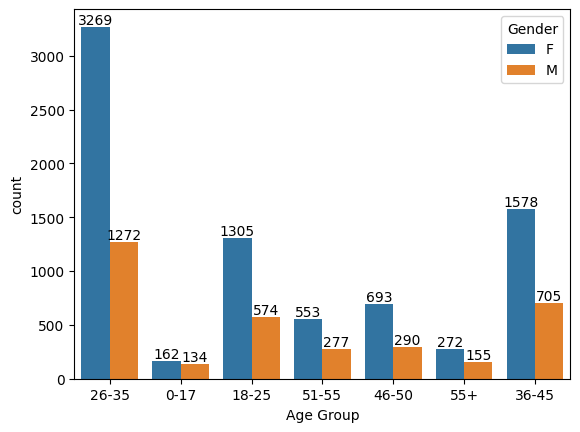

In [20]:
ax = sns.countplot(x = 'Age Group',data =df,hue ='Gender')
for bars in ax.containers:
    ax.bar_label(bars)


<Axes: xlabel='Age Group', ylabel='Amount'>

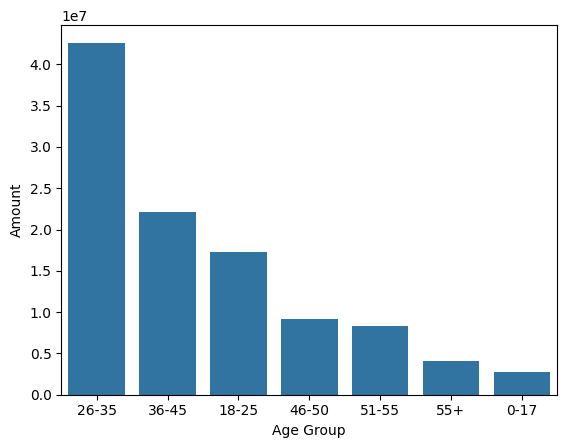

In [21]:
#age group vs amount
sales_gen= df.groupby(['Age Group'],as_index = False)['Amount'].sum().sort_values(['Amount'], ascending = False)
sns.barplot(x='Age Group',y= 'Amount',data =sales_gen)


From the above graph we can see that the most of the buyers  are between the age of 26-35.

### State

<Axes: xlabel='State', ylabel='Orders'>

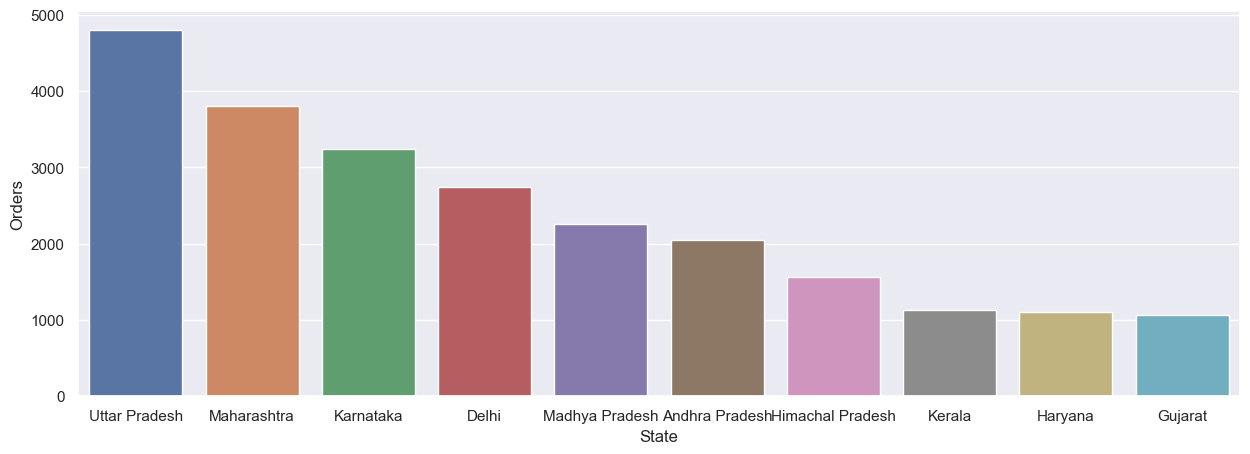

In [22]:
sales_gen =  df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(['Orders'], ascending = False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot( x= 'State' , y = 'Orders',data = sales_gen,hue='State')

<Axes: xlabel='State', ylabel='Amount'>

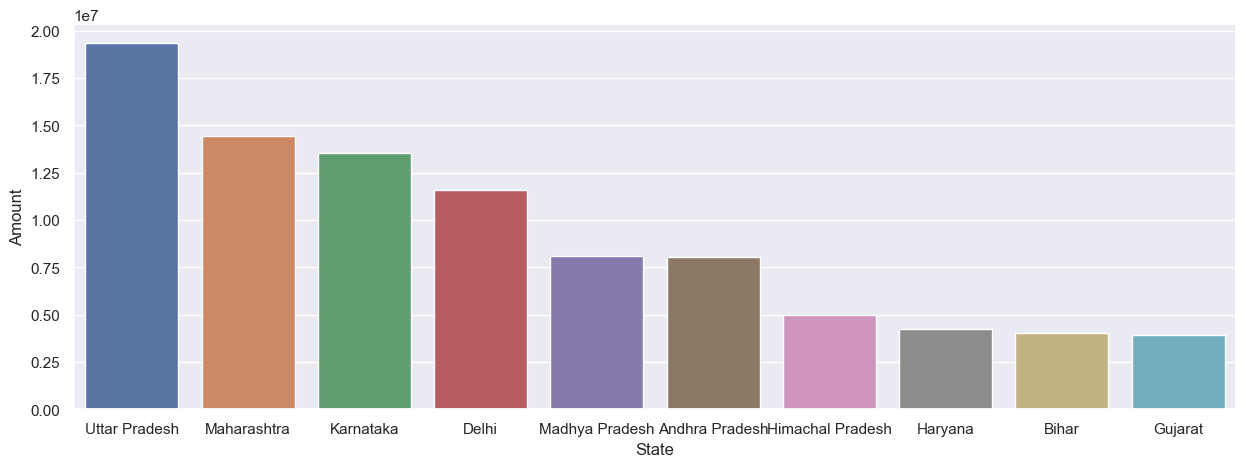

In [23]:
sales_gen =  df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(['Amount'], ascending = False).head(10)
sns.barplot(x='State', y ='Amount', data = sales_gen,hue = 'State')

From the above graph we can see that the most of the buyers are from UP,Maharashtra and Karnataka.

### Marital Status

C:\Users\kunal\AppData\Local\Temp\ipykernel_14768\2691778208.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Married','Single'])


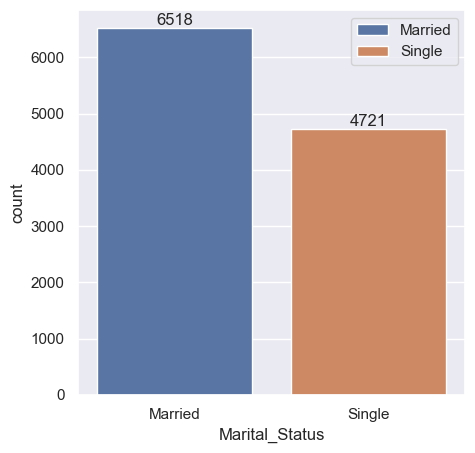

In [26]:
ax = sns.countplot(x='Marital_Status',data = df,hue = 'Marital_Status')
ax.set_xticklabels(['Married','Single'])
plt.legend(['Married','Single'])

sns.set(rc={'figure.figsize':(5,5)})

for bar in ax.containers:
    ax.bar_label(bar)


C:\Users\kunal\AppData\Local\Temp\ipykernel_14768\2246989623.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Married','Single'])


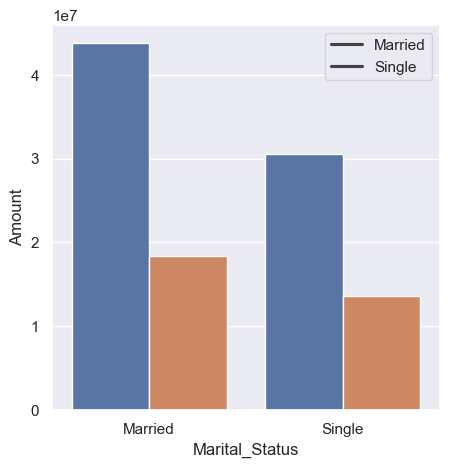

In [25]:
sales_gen = df.groupby(['Marital_Status','Gender'],as_index =False)['Amount'].sum().sort_values(by = 'Amount',ascending = False)
sns.set(rc = { 'figure.figsize':(5,5)})
ax = sns.barplot(data = sales_gen , x= 'Marital_Status',y='Amount',hue='Gender')
ax.set_xticklabels(['Married','Single'])
plt.legend(['Married','Single'])

From the above graph we can see that the most of the buyers are married females and they have high purchasing power

### Occupation

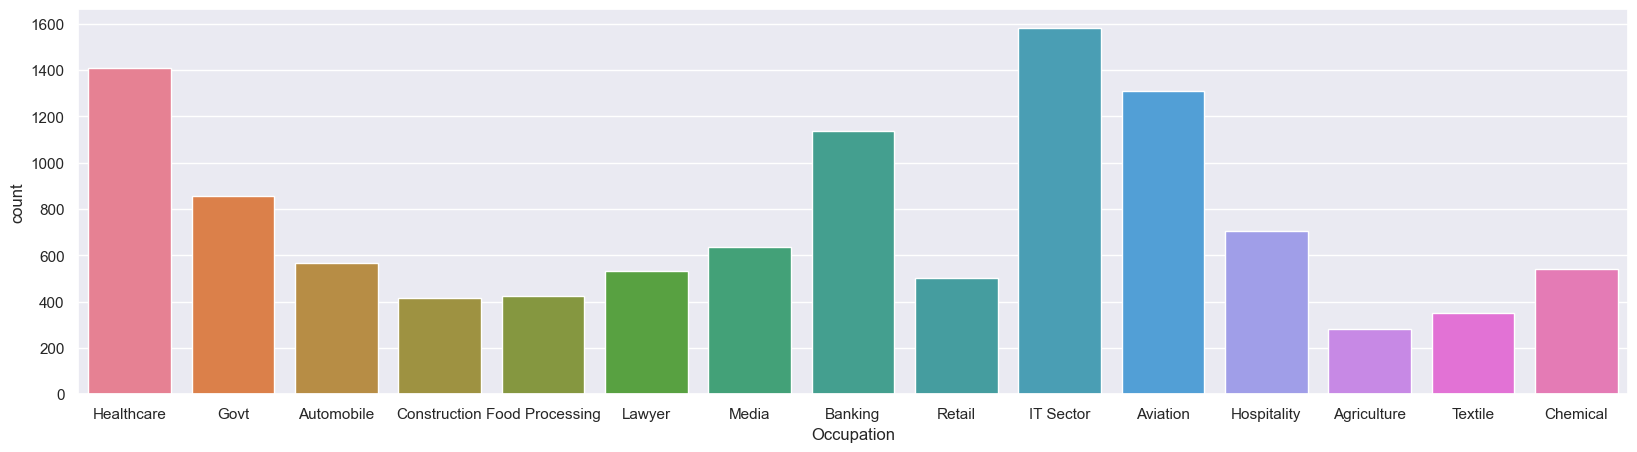

In [31]:
ax = sns.countplot(x='Occupation',data = df,hue = 'Occupation')

sns.set(rc={'figure.figsize':(20,5)})



<Axes: xlabel='Occupation', ylabel='Amount'>

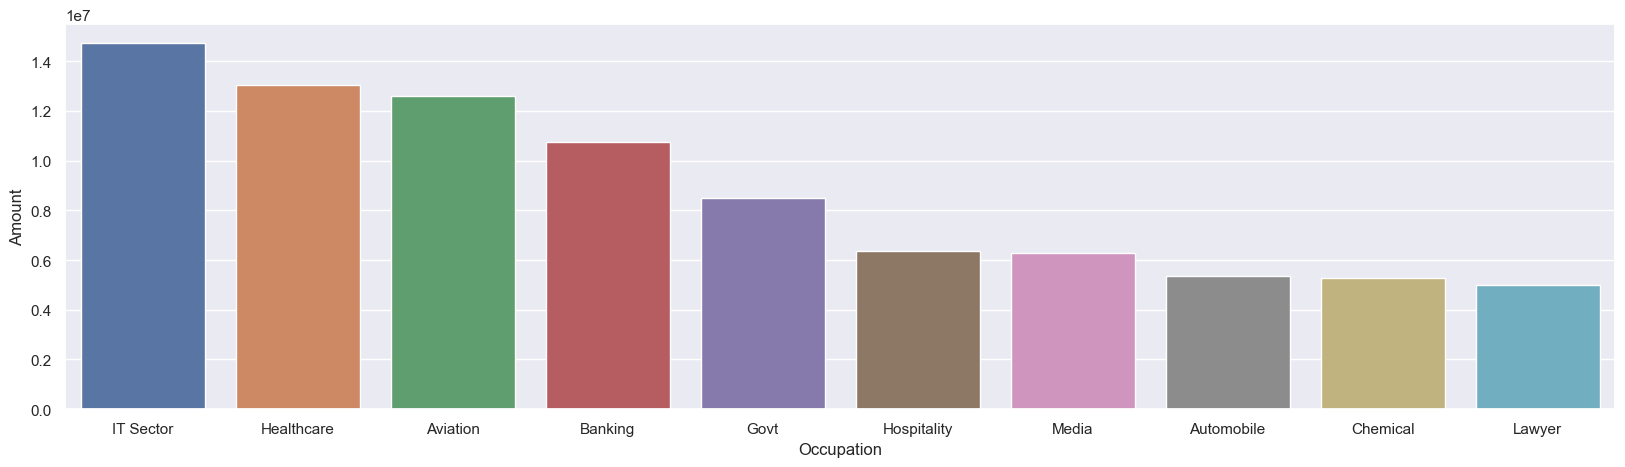

In [22]:
sales_gen = df.groupby(['Occupation'],as_index = False)['Amount'].sum().sort_values(['Amount'], ascending = False ).head(10)

sns.barplot(x = 'Occupation', y ='Amount' ,data = sales_gen ,hue = 'Occupation')



From the above graph we can see that most of the purchases are done by the people who come from IT Sector , Healthcare and Avation.

### Product Catagory

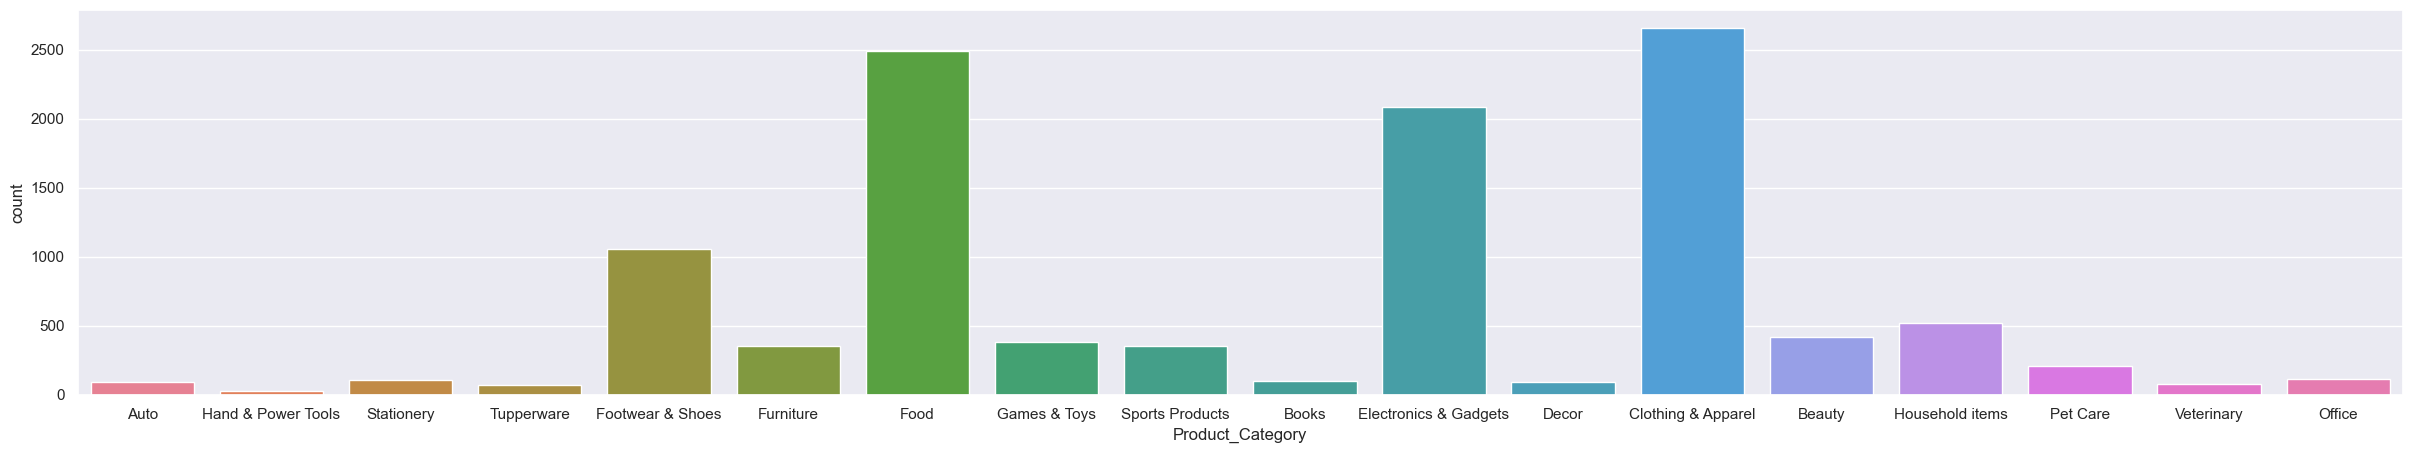

In [27]:
sns.set(rc={'figure.figsize':(30,5)})

ax = sns.countplot(x='Product_Category',data = df,hue = 'Product_Category')


<Axes: xlabel='Product_Category', ylabel='Amount'>

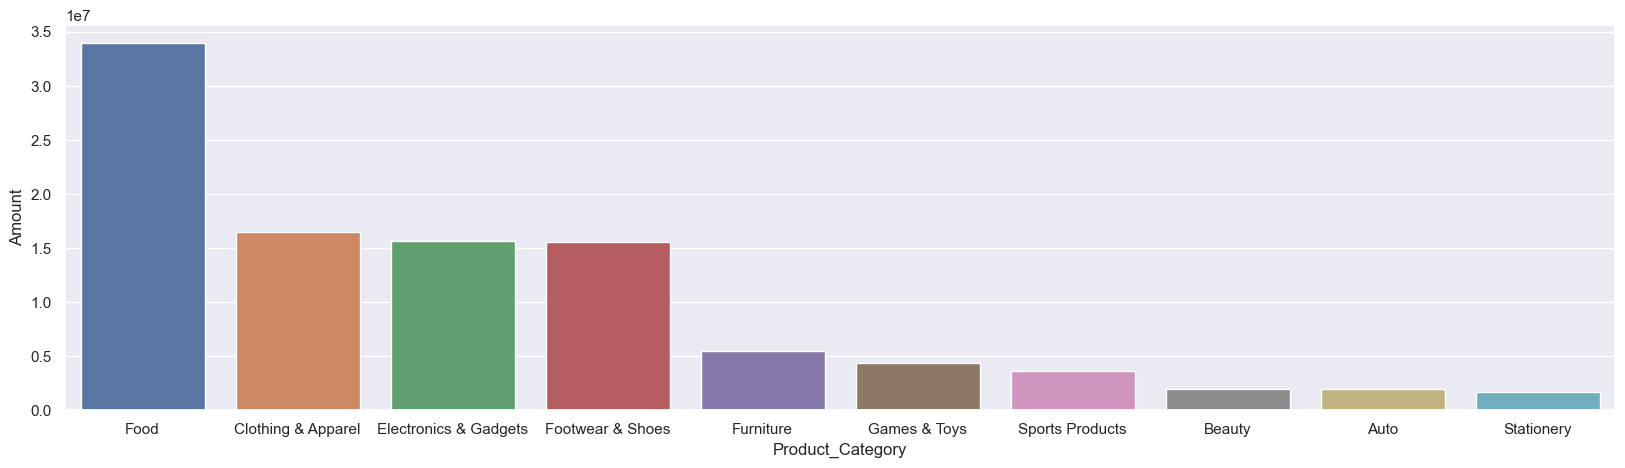

In [28]:

sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc = {'figure.figsize':(20,5)})

sns.barplot(x ='Product_Category',y ='Amount',data= sales_state,hue= 'Product_Category')


From the above graph we can see that most of the product sold are from Food ,clothing and electronics category


<Axes: xlabel='Product_ID', ylabel='Orders'>

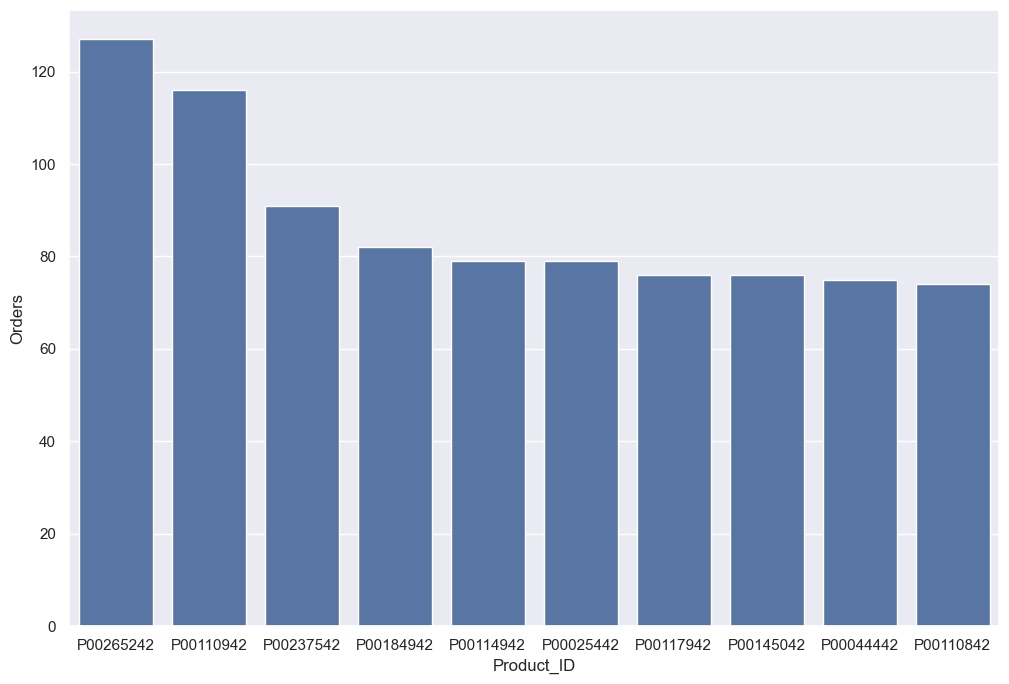

In [29]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')

# Conclusion

Married females between the age group of 26-35 yrs working in IT Sector ,Healthcare and Aviation are more likely to buys products from Food , Clothing and Electronics category.